In [1]:
import pandas as pd
import cv2

from matplotlib import pyplot as plt
track_csv = '../../inference/tracking/Auklab1_FAR3_2022-07-09_04.00.00.mp4_botsort_custom.csv'

In [2]:
track_pd = pd.read_csv(track_csv, index_col=0)

In [3]:
track_pd.columns

Index(['x', 'y', 'w', 'h', 'track_id', 'class', 'conf', 'time', 'frame',
       'ledge', 'filename'],
      dtype='object')

In [5]:
track_pd.track_id.nunique()

916

In [8]:
track_pd.track_id.unique()[916]

1145.0

In [6]:
# Open the video file
video_path = "../../Auklab1_FAR3_2022-07-09_04.00.00.mp4"
cap = cv2.VideoCapture(video_path)
success, frame = cap.read()

In [7]:
success

True

In [8]:
colors = [(255, 0, 0), (0, 0, 255), (0, 255, 0), (255, 255, 0), (255,255, 255)]
for index, row in track_pd.iterrows():
    frame = cv2.circle(frame, center=(int(row.x+row.w), int(row.y+row.h)), radius=4, color=colors[int(row.track_id)])

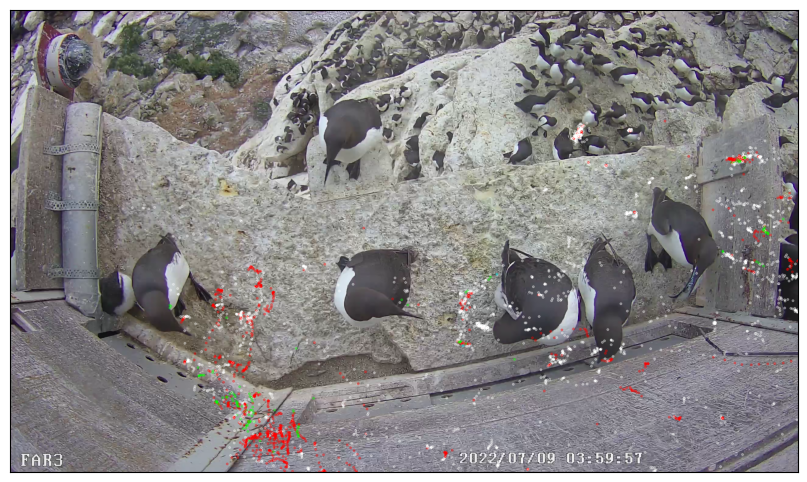

In [38]:
plt.figure(figsize=(18, 6))
RGB_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_frame)
# remove the axis / ticks for a clean looking image
plt.xticks([])
plt.yticks([])
plt.show()


In [9]:
tracks = []
for i, row in track_pd[track_pd.track_id == 1].iterrows():
    tracks.append(float(row.x), float(row.y))

points = np.hstack(tracks).astype(np.int32).reshape((-1, 1, 2))
cv2.polylines(last_frame, [points], isClosed=False, color=colors[1], thickness=10)

17392